                                                    Иззатов Эльшан Али-заде

#                                    Лабораторная работа №5

## Массивы Numpy

**1.** Сформировать одномерный массив, состоящий из n вещественных элементов co значением от -10 до 10.0. Для случайного числа y, такого, что *минимальный элемент массива < y < максимальный элемент массива*, вычислить:  
  
* произведение элементов массива, значения модуля которых больше модуля y,  
  
* сумму модулей остальных элементов.

In [41]:
import numpy as np
import random

n = int(input())
mult = 1
total_sum = 0

#a = np.random.randint(-100, 100, size=n)
#a = np.around(a / 10, decimals=1)

a = [random.uniform(-10.0, 10.0) for _ in range(n)]
a = np.around(a , decimals=1)

min_a = np.min(a)
max_a = np.max(a)

# Генерируем y между min и max (исключая границы)
if min_a < max_a:
    y = random.uniform(min_a, max_a) #генерирует случайное вещественное число y в диапазоне min_a, max_a
else:
    # Если все элементы одинаковые, генерируем y = 0 (или другое значение)
    y = 0.0

for element in a:
    if abs(element) > abs(y):
        mult *= round(element,1)
    else:
        total_sum += abs(round(element,1))  # Суммируем модули
        print(total_sum)

print(a)
print(min(a))
print(y)
print(round(mult,1))
print(total_sum)

3
[-4.6 -8.9  6.6]
-8.9
0.5691196796477218
270.2
0


**2.** Найти максимальный элемент в одномерном массиве x среди элементов, перед которыми стоит нулевой.

In [42]:
import numpy as np
import random
#x = int(input())
#a = np.random.randint(-100, 100, size=x)
a = [5, 7, 0, 2, 3, 0, 5, 7, 0, 9, 7, 2]
b = []
for i in range(len(a)):
    if a[i-1] == 0:
        b.append(i)

print(a)
print(b)
print(max(b))

[5, 7, 0, 2, 3, 0, 5, 7, 0, 9, 7, 2]
[3, 6, 9]
9


**3.** Дана целочисленная прямоугольная матрица. Определить: количество строк, не содержащих ни одного нулевого элемента, а также
максимальное значение из чисел, встречающихся в заданной матрице более одного раза.

In [ ]:
N = int(input())
matrix = []
nozerro = 0

for i in range(N):
    matrix.append(list(map(int, input().split())))

print()

for i in range (N):
    for j in range (N):
        print(matrix[i][j], end = " ")
    print()

for i in range (N):
    if 0 not in matrix[i]:
        nozerro += 1

print("\nКоличество строк, не содержащих ни одного нулевого элемента: ", nozerro)

# Преобразуем матрицу в вектор
vector = []
for row in matrix:
    vector.extend(row)


# Сортируем вектор по убыванию
vector.sort(reverse=True)

# Ищем повторяющиеся элементы и выводим первый найденный
found_duplicate = False
for i in range(len(vector) - 1):
    if vector[i] == vector[i + 1]:
        print("Максимальное значение из чисел, встречающихся в заданной матрице более одного раза:", vector[i])
        found_duplicate = True
        break

if not found_duplicate:
    print('Повторяющихся значений не найдено')

3
1 2 3
4 5 6
7 8 8

1 2 3 
4 5 6 
7 8 8 
Количество строк, не содержащих ни одного нулевого элемента:  3

Максимальное значение из чисел, встречающихся в заданной матрице более одного раза: 8


**4.** Элемент матрицы называется локальным минимумом, если он строго меньше всех имеющихся у него соседей. Соседями элемента А[i,j] в матрице назовем элементы А[k,l], где i-1<=k<=i+1, j-1 < l <j+1, (k, l) != (i, j).  
Подсчитать количество локальных минимумов заданной в файле input.txt матрицы размером 10 на 10. Предусмотреть, что в файле данные могут быть введены некорректно.

In [43]:
# Генерация матрицы 10x10 со случайными значениями от 10 до 20
matrix = [[random.randint(10, 20) for _ in range(10)] for _ in range(10)]

# Вывод матрицы
print("Матрица 10x10:")
for row in matrix:
    print(" ".join(map(str, row)))

Матрица 10x10:
14 14 20 10 16 20 13 15 10 11
18 15 10 20 18 18 14 14 12 10
12 14 20 13 16 17 20 14 11 12
12 13 14 12 12 11 18 17 20 20
11 16 12 13 13 14 15 12 10 11
14 20 16 14 11 13 12 11 14 12
13 11 18 10 17 19 10 16 17 14
20 19 17 19 20 15 11 13 20 15
12 10 15 18 14 17 10 19 15 20
19 10 19 14 20 10 12 12 18 14


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Чтение данных из файла input.txt

filepath = '/content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/input.txt'

# Пытаемся открыть файл input.txt для чтения
try:
    f = open(filepath, "r")
    lines = f.readlines()
    f.close()
except:
    print("Файл input.txt не найден!")
    exit()

# Проверка, что в файле ровно 10 строк
if len(lines) != 10:
    print("Ошибка: в файле должно быть ровно 10 строк, а найдено", len(lines))
    exit()

# Создание матрицы 10x10
matrix = []
for line_num in range(10):
    values = lines[line_num].split()
    if len(values) != 10:
        print("Ошибка: в строке", line_num + 1, "должно быть 10 чисел!")
        exit()
    row = []
    for val in values:
        try:
            num = float(val)  # Если нужны целые числа, замените float() на int()
        except:
            print("Ошибка: значение", val, "в строке", line_num + 1, "не является числом!")
            exit()
        row.append(num)
    matrix.append(row)

# Подсчет локальных минимумов
local_min_count = 0

# Проходим по каждому элементу матрицы
for i in range(10):
    for j in range(10):
        current = matrix[i][j]
        is_local_min = True  # Предполагаем, что элемент является локальным минимумом

        # Проверяем всех соседей в квадрате 3x3 вокруг элемента
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                # Пропускаем сам элемент
                if di == 0 and dj == 0:
                    continue
                ni = i + di  # индекс соседа по строке
                nj = j + dj  # индекс соседа по столбцу

                # Если сосед выходит за границы матрицы, его пропускаем
                if ni < 0 or ni >= 10 or nj < 0 or nj >= 10:
                    continue

                # Если сосед меньше или равен текущему значению, элемент не локальный минимум
                if matrix[ni][nj] <= current:
                    is_local_min = False
                    break
            if not is_local_min:
                break

        if is_local_min:
            local_min_count += 1

print("Количество локальных минимумов:", local_min_count)

Количество локальных минимумов: 10


**5.** Определите, является ли массив магическим квадратом (суммы по всем горизонталям, вертикалям и двум диагоналям равны).

In [48]:
# Считываем размер матрицы N
N = int(input("Введите размер матрицы: "))

# Заполнение матрицы с клавиатуры.
print("Введите строки матрицы (каждая строка должна содержать", N, "чисел, разделенных пробелами):")
matrix = []
for i in range(N):
    # Считываем очередную строку и преобразуем её в список чисел
    row = list(map(int, input().split()))
    matrix.append(row)

print("\nВведенная матрица:")
for i in range(N):
    for j in range(N):
        print(matrix[i][j], end=" ")
    print()

# Определяем эталонную сумму (магическую сумму)
# Берем сумму первой строки
magic_sum = 0
for j in range(N):
    magic_sum += matrix[0][j]

# Переменная, которая будет True, если матрица магическая, и False, если нет.
is_magic = True

# Проверка сумм по строкам
for i in range(N):
    row_sum = 0
    for j in range(N):
        row_sum += matrix[i][j]
    if row_sum != magic_sum:
        is_magic = False
        # Если хотя бы одна строка не соответствует, можно остановиться
        break

# Если суммы строк правильные, проверяем суммы столбцов
if is_magic:
    for j in range(N):
        col_sum = 0
        for i in range(N):
            col_sum += matrix[i][j]
        if col_sum != magic_sum:
            is_magic = False
            break

# Проверка сумм по диагоналям
if is_magic:
    diag1_sum = 0  # главная диагональ (сверху слева вниз направо)
    diag2_sum = 0  # побочная диагональ (сверху справа вниз налево)
    for i in range(N):
        diag1_sum += matrix[i][i]
        diag2_sum += matrix[i][N - i - 1]
    if diag1_sum != magic_sum or diag2_sum != magic_sum:
        is_magic = False

# Вывод результата проверки
if is_magic:
    print("\nМассив является магическим квадратом.")
else:
    print("\nМассив не является магическим квадратом.")

Введите размер матрицы: 4
Введите строки матрицы (каждая строка должна содержать 4 чисел, разделенных пробелами):
4 5 7 6
4 5 7 6
4 5 7 6
4 5 7 6

Введенная матрица:
4 5 7 6 
4 5 7 6 
4 5 7 6 
4 5 7 6 

Массив не является магическим квадратом.


**6.** Программным образом заполните массив одним из двух следующих способов. Размерность n и m, а также номер способа заполнения вводится пользователем при запуске программы.
Результат записать в файл.

In [49]:
import numpy as np
# Получаем ввод от пользователя
try:
    n = int(input("Введите количество строк (n): "))
    m = int(input("Введите количество столбцов (m): "))
    fill_method = int(input("Выберите способ заполнения (1 или 2): "))

    # Проверка корректности ввода
    if fill_method not in (1, 2):
        raise ValueError("Неверный номер способа заполнения. Допустимы значения 1 или 2.")

    # Создаем массив
    matrix = np.zeros((n, m), dtype=int)  # Создаем массив, заполненный нулями (по умолчанию)

    # Заполняем массив в соответствии с выбранным способом
    if fill_method == 1:
        # Способ 1: Заполнение по порядку, начиная с 1
        k = 1
        for i in range(n):
            for j in range(m):
                matrix[i, j] = k
                k += 1
    elif fill_method == 2:
        # Способ 2: Заполнение змейкой (строка, потом следующая строка в обратном порядке, и т.д.)
        for i in range(n):
            if i % 2 == 0:  # Четные строки (заполняем слева направо)
                for j in range(m):
                    matrix[i, j] = i * m + j + 1
            else:  # Нечетные строки (заполняем справа налево)
                for j in range(m - 1, -1, -1):
                    matrix[i, j] = i * m + (m - 1 - j) + 1

    # Выводим заполненный массив (для проверки)
    print("Заполненный массив:")
    for row in matrix:
        print(*row)


    file_path = '/content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/output.txt'
    try:
        with open(file_path, "w") as f:
            for row in matrix:
                f.write(" ".join(map(str, row)) + "\n")  # Записываем строку, разделяя элементы пробелами и добавляя перенос строки
        print(f"Массив успешно записан в файл: {file_path}")
    except Exception as e:
        print(f"Ошибка при записи в файл: {e}")

except ValueError as e:
    print(f"Ошибка ввода: {e}")
except Exception as e:
    print(f"Произошла непредвиденная ошибка: {e}")

Введите количество строк (n): 5
Введите количество столбцов (m): 6
Выберите способ заполнения (1 или 2): 2
Заполненный массив:
1 2 3 4 5 6
12 11 10 9 8 7
13 14 15 16 17 18
24 23 22 21 20 19
25 26 27 28 29 30
Массив успешно записан в файл: /content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/output.txt


**7.** Удалите строку и столбец, на пересечении которых находится минимальный элемент массива. После этого отсортируйте столбцы массива по неубыванию минимальных элементов в них.

In [50]:
import numpy as np

# Создаем простой массив (можно изменить для экспериментов)
matrix = np.array([[9, 5, 2],
                   [7, 3, 8],
                   [4, 2, 1]])

print("Исходный массив:\n", matrix)

# 1. Находим минимальный элемент и его координаты
min_val = np.min(matrix)
min_row, min_col = np.where(matrix == min_val)  # Возвращает кортеж из массивов (строки, столбцы)
min_row = min_row[0]  # Получаем номер строки
min_col = min_col[0]  # Получаем номер столбца

print(f"Минимальный элемент: {min_val}, строка: {min_row+1}, столбец: {min_col+1}")

# 2. Удаляем строку и столбец
matrix = np.delete(matrix, min_row, axis=0)  # Удаляем строку
matrix = np.delete(matrix, min_col, axis=1)  # Удаляем столбец

print("Массив после удаления строки и столбца:\n", matrix)

# 3. Сортировка столбцов по минимальным элементам
#  Создаем массив для хранения минимальных элементов каждого столбца
min_in_cols = np.min(matrix, axis=0)  # Минимальные значения в каждом столбце

#  Сортируем индексы столбцов по минимальным значениям
sorted_indices = np.argsort(min_in_cols)

#  Сортируем столбцы массива
matrix = matrix[:, sorted_indices]

print("Отсортированный массив (по минимальным элементам столбцов):\n", matrix)

Исходный массив:
 [[9 5 2]
 [7 3 8]
 [4 2 1]]
Минимальный элемент: 1, строка: 3, столбец: 3
Массив после удаления строки и столбца:
 [[9 5]
 [7 3]]
Отсортированный массив (по минимальным элементам столбцов):
 [[5 9]
 [3 7]]


## Обработка исключений. Библиотека Matplotlib

**8.**	Реализовать проверку числа 35742549198872617291353508656626642567 на простоту последовательным перебором возможных делителей (не нужен эффективный алгоритм). Выполнить замер времени работы кода без обработки исключений и с ней. Можно проводить тестирование на числе 2147483647 или 11111111111111111111111.

In [51]:
import time

def is_prime_without_exceptions(n):
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def is_prime_with_exceptions(n):
    if n <= 1:
        return False
    try:
        for i in range(2, n):
            if n % i == 0:
                return False
    except Exception:
        # Обработка исключений не требуется для данной задачи,
        # но может быть добавлена для более сложных сценариев
        pass
    return True

number = 2147483647  # Можно заменить на другое число для тестирования

# Проверка без обработки исключений
start_time = time.time()
result = is_prime_without_exceptions(number)
end_time = time.time()
print(f"Число {number} {'простое' if result else 'не простое'} (без обработки исключений)")
print(f"Время выполнения: {end_time - start_time} секунд")

# Проверка с обработкой исключений
start_time = time.time()
result = is_prime_with_exceptions(number)
end_time = time.time()
print(f"Число {number} {'простое' if result else 'не простое'} (с обработкой исключений)")
print(f"Время выполнения: {end_time - start_time} секунд")

Число 2147483647 простое (без обработки исключений)
Время выполнения: 259.8833019733429 секунд
Число 2147483647 простое (с обработкой исключений)
Время выполнения: 263.17289996147156 секунд


**9.**	В каталоге texts сохранить не менее 10 произвольных текстов объемом не менее 500 слов.  Пользователь программным образом выбирает текст. Программа строит график частоты для 50 наиболее частотных слов текста.

Доступные файлы:
1Vvedenie.txt
2PyTorch.txt
3Gradienti.txt
4Neyroseti.txt
5Podgotovka.txt
6Rekurrentseti.txt
7Prognozirovanie.txt
8CNN.txt
9GNN.txt
10Transformer.txt
Введите номер файла: 3


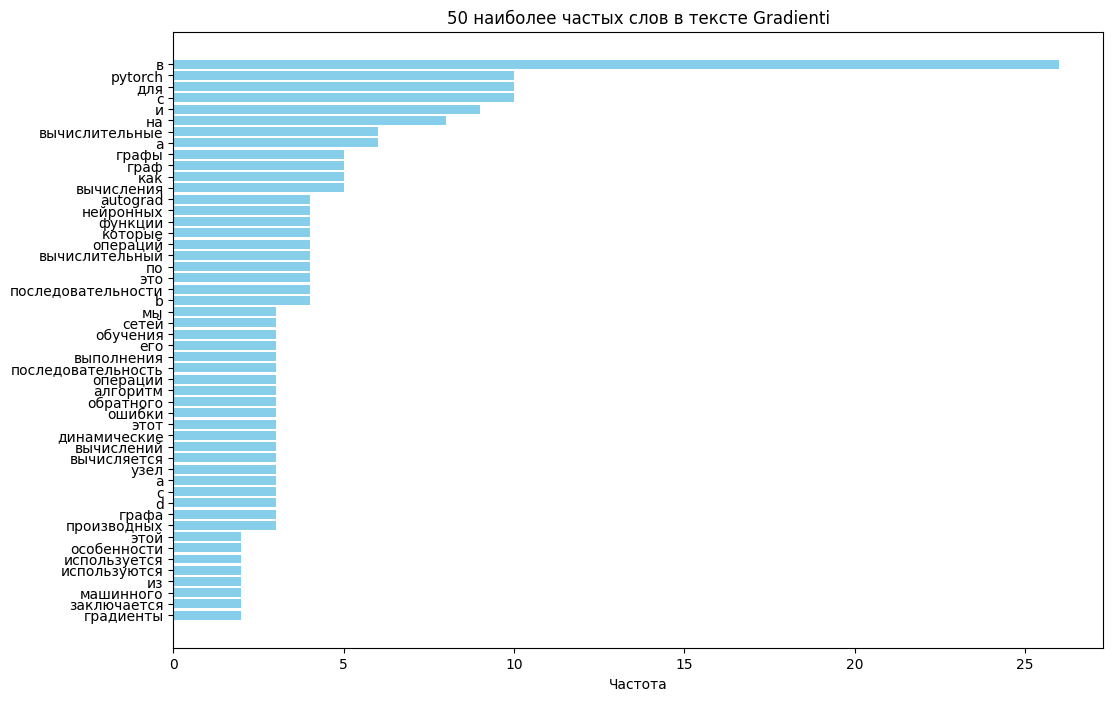

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import os

# Путь к папке с текстами
texts_folder = '/content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/texts/'
files = os.listdir(texts_folder)

# Функция для чтения текстов и вычисления частоты слов
def plot_word_frequency(file_number):
    # Формирование имени файла
    file_name = None
    for file in files:
        if file.startswith(file_number):
            file_name = file
            break

    if file_name is None:
        print(f"Файл с номером {file_number} не найден.")
        return

    file_path = os.path.join(texts_folder, file_name)

    # Проверка существования файла
    if not os.path.exists(file_path):
        print(f"Файл {file_name} не найден.")
        return

    # Чтение текста из файла
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Обработка текста
    text = text.lower()  # Приведение к нижнему регистру
    words = re.findall(r'\b\w+\b', text)  # Найдем все слова

    # Подсчёт частоты слов
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(50)

    # Преобразуем результаты в DataFrame
    words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Построение графика
    plt.figure(figsize=(12, 8))
    plt.barh(words_df['Word'][::-1], words_df['Frequency'][::-1], color='skyblue')
    plt.xlabel('Частота')

    # Удаление цифры и.txt из названия файла
    title = file_name.split('.')[0]
    title = title[len(file_number):]
    plt.title(f'50 наиболее частых слов в тексте {title}')
    plt.show()

# Выбор текста пользователем
print("Доступные файлы:")
for file in sorted(files, key=lambda x: int(re.match(r'\d+', x).group())):
    print(file)

file_number = input("Введите номер файла: ")
plot_word_frequency(file_number)

**10.**	Считать данные из текстового документа, в котором написано годовое количество осадков:

*Январь 15*

*Февраль 20*

…

*Декабрь 18*


Вывести их в форме диаграмм: обычная, горизонтальная, круговая (все виды диаграмм должны быть на одном рисунке). Сохранить получившийся рисунок в файл.


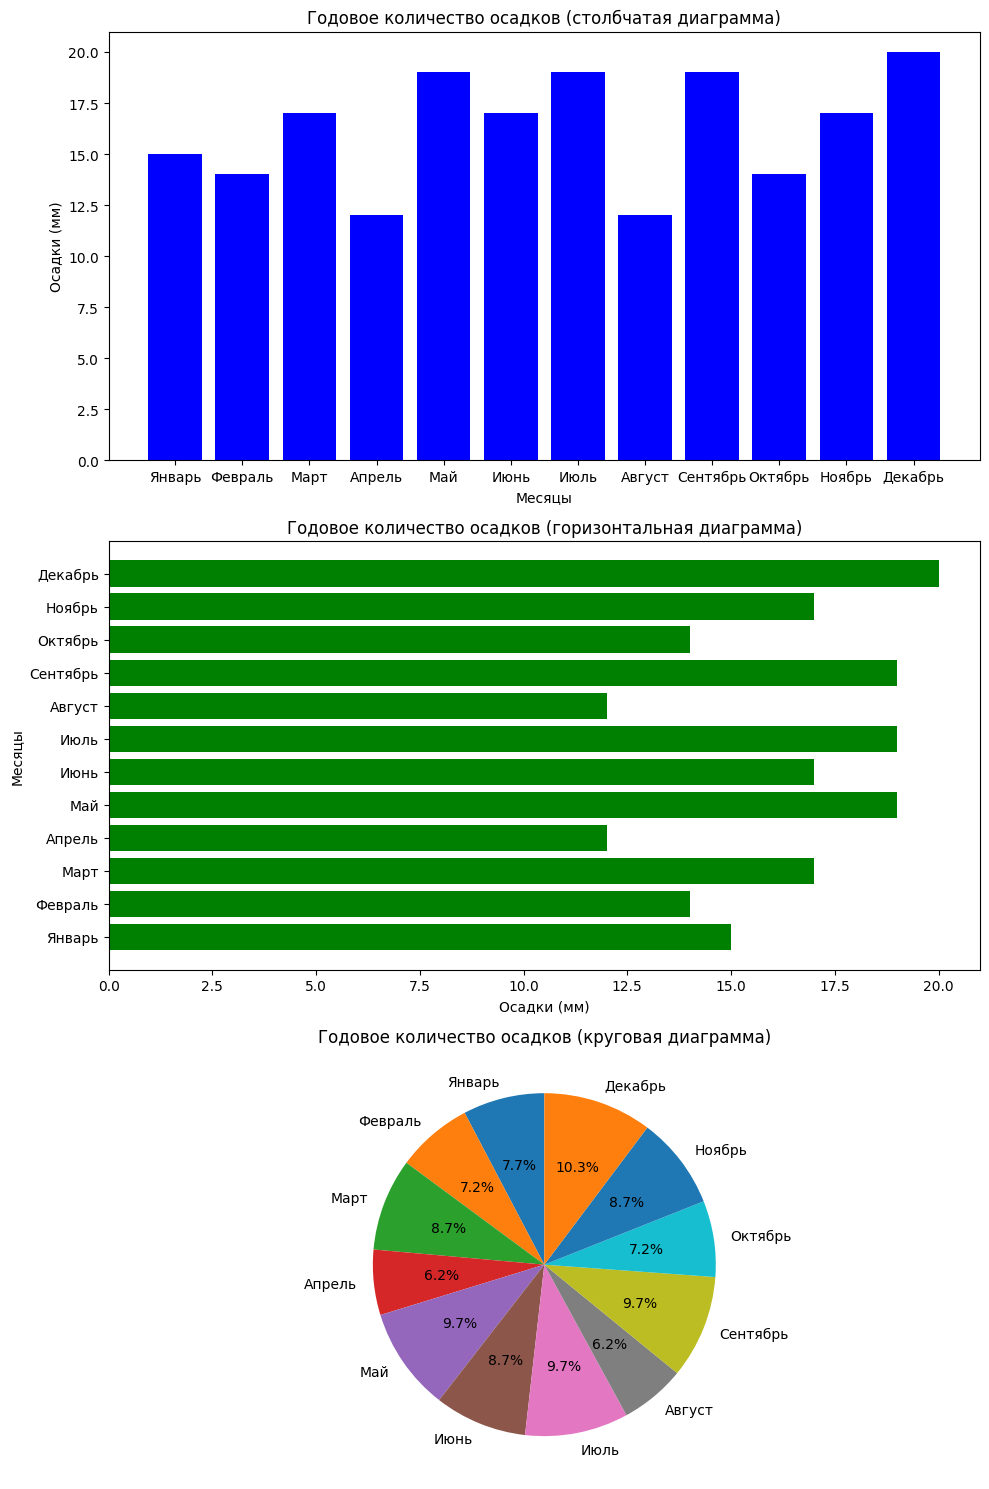

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Считываем данные из файла

file_path = '/content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/osadki.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Обрабатываем данные
months = []
precipitation = []

for line in data:
    month, amount = line.split()
    months.append(month)
    precipitation.append(int(amount))

# Создаем DataFrame
df = pd.DataFrame({
    'Месяцы': months,
    'Осадки': precipitation
})

# Создание подграфиков
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Обычная столбчатая диаграмма
axs[0].bar(df['Месяцы'], df['Осадки'], color='blue')
axs[0].set_title('Годовое количество осадков (столбчатая диаграмма)')
axs[0].set_ylabel('Осадки (мм)')
axs[0].set_xlabel('Месяцы')

# Горизонтальная диаграмма
axs[1].barh(df['Месяцы'], df['Осадки'], color='green')
axs[1].set_title('Годовое количество осадков (горизонтальная диаграмма)')
axs[1].set_xlabel('Осадки (мм)')
axs[1].set_ylabel('Месяцы')

# Круговая диаграмма
axs[2].pie(df['Осадки'], labels=df['Месяцы'], autopct='%1.1f%%', startangle=90)
axs[2].set_title('Годовое количество осадков (круговая диаграмма)')

# Отображение графика
plt.tight_layout()

# Сохранение графика в файл в формате PNG
plt.savefig('/content/drive/MyDrive/Программирование на языке Python/Lab_Python_5_PIM/osadki.png')

# Показать график
plt.show()

**11.** Нарисовать звёздочками зелёного цвета график кардиоиды в полярной системе координат. Добавьте легенду с заголовком «Функция» и подписью «Кардиоида» в левый верхний угол.
Угол принадлежит промежутку от 0 до 3π/2, r = 2,5. Уравнение кардиоиды: ρ = 2*r*(1 + cosφ).



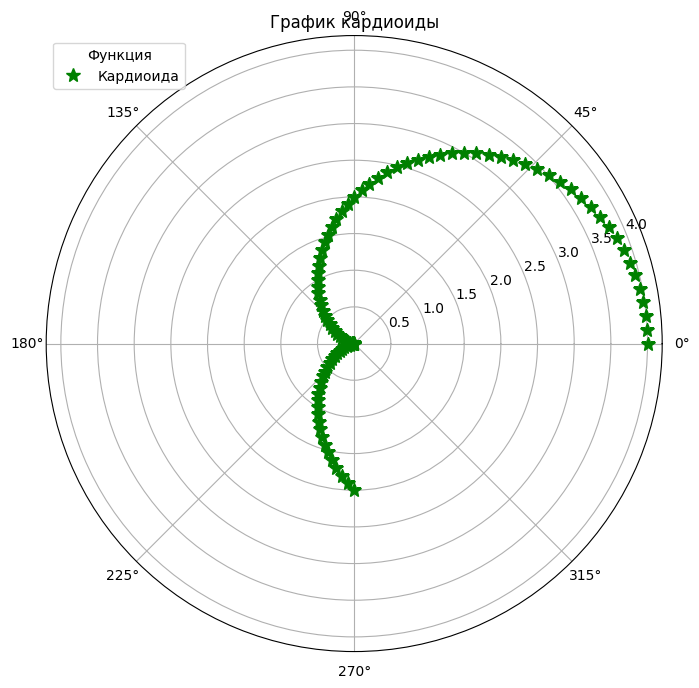

In [54]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt

# Задаем диапазон углов φ от 0 до 3π/2
phi = np.linspace(0, 3 * np.pi / 2, 100)

# Уравнение кардиоиды: ρ = 2r(1 + cosφ)
r = 2 * (1 + np.cos(phi))

# Настраиваем график
plt.figure(figsize=(8, 8))
plt.polar(phi, r, color='green', linestyle='None', marker='*', markersize=10)  # Используем звёздочки

# Добавляем легенду
plt.legend(['Кардиоида'], title='Функция', loc='upper left')

# Задаем заголовок
plt.title('График кардиоиды')

# Показываем график
plt.show()

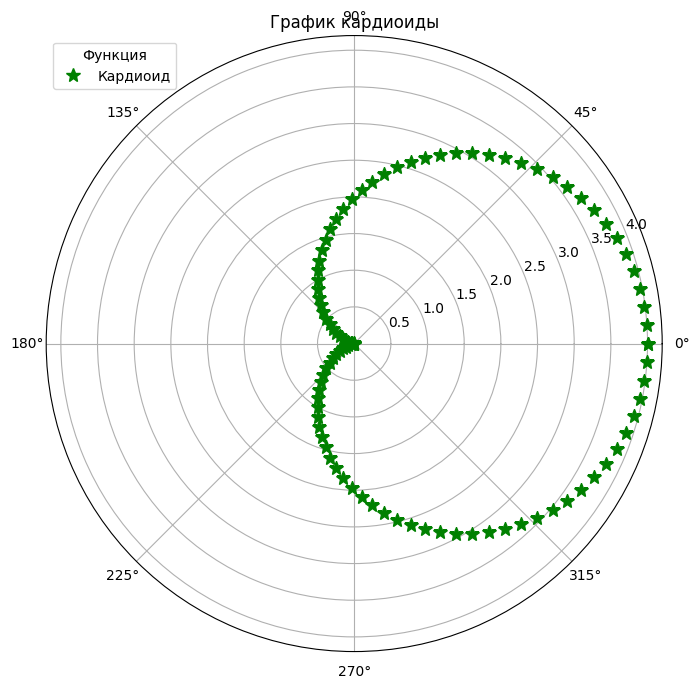

In [55]:
# Задаем диапазон углов φ от 0 до 2π
phi = np.linspace(0, 2 * np.pi, 100)

# Уравнение кардиоиды: r = 2(1 + cos(φ))
r = 2 * (1 + np.cos(phi))

# Настраиваем график
plt.figure(figsize=(8, 8))
plt.polar(phi, r, color='green', linestyle='None', marker='*', markersize=10)  # Используем звёздочки

# Добавляем легенду
plt.legend(['Кардиоид'], title='Функция', loc='upper left')

# Задаем заголовок
plt.title('График кардиоиды')

# Показываем график
plt.show()

**12.** Написать программу изображения графика функции y=√x. Не забывайте про то, что функция имеет значения ≥ 0. Предварительно программа запрашивает у пользователя следующую информацию:

* цвет графика (программа предлагает не менее пяти различных цветов);
* тип линии (программа предлагает не менее трех различных вариантов);
* толщину линии (программа предлагает не менее пяти различных вариантов).

Все запросы к пользователю обрабатываются с использованием обработки исключительных ситуаций. Варианты можно вводить строкой или числом (на ваш выбор).


Программа для построения графика функции y = √x
Доступные цвета: red, green, blue, orange, purple
Введите цвет графика: red
Доступные типы линий: '-', '--', '-.', ':'
Введите тип линии: :
Доступные толщины линии: 1, 2, 3, 4, 5
Введите толщину линии (число от 1 до 5): 3


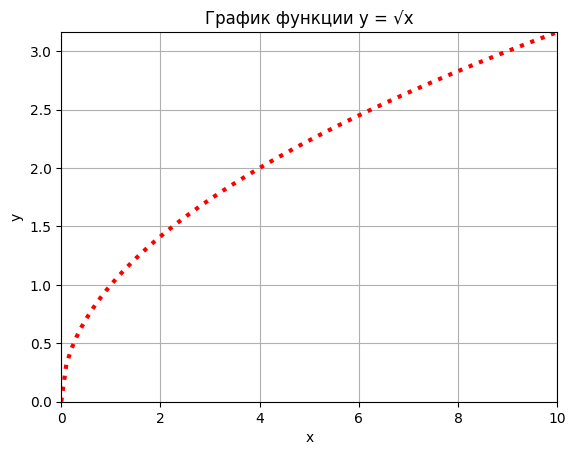

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def get_color():
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    while True:
        print("Доступные цвета: red, green, blue, orange, purple")
        color = input("Введите цвет графика: ").strip().lower()
        if color in colors:
            return color
        else:
            print("Некорректный ввод. Попробуйте еще раз.")

def get_line_style():
    line_styles = ['-', '--', '-.', ':']
    while True:
        print("Доступные типы линий: '-', '--', '-.', ':'")
        line_style = input("Введите тип линии: ").strip()
        if line_style in line_styles:
            return line_style
        else:
            print("Некорректный ввод. Попробуйте еще раз.")

def get_line_width():
    while True:
        print("Доступные толщины линии: 1, 2, 3, 4, 5")
        try:
            line_width = int(input("Введите толщину линии (число от 1 до 5): "))
            if line_width in range(1, 6):
                return line_width
            else:
                print("Толщина линии должна быть от 1 до 5. Попробуйте еще раз.")
        except ValueError:
            print("Некорректный ввод. Пожалуйста, введите целое число.")

def plot_graph(color, line_style, line_width):
    x = np.linspace(0, 10, 100)
    y = np.sqrt(x)

    plt.plot(x, y, color=color, linestyle=line_style, linewidth=line_width)
    plt.title('График функции y = √x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, 10)
    plt.ylim(0, np.sqrt(10))
    plt.grid()
    plt.show()

def main():
    print("Программа для построения графика функции y = √x")
    color = get_color()
    line_style = get_line_style()
    line_width = get_line_width()
    plot_graph(color, line_style, line_width)

if __name__ == "__main__":
    main()